<a href="https://colab.research.google.com/github/osaldealwis/CM2604CW/blob/main/CM2604CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CM2604 CW**
#V.O.V De Alwis
#RGU - 2330972
#IIT - 20232312

#**Dataset Preperation**

Uploading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank-full.csv to bank-full (1).csv


Loading and exploring the dataset

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the dataset
data = pd.read_csv('bank-full.csv', sep=';')


In [ ]:
#Exploring the dataset

# Display the first few rows
print(data.head())

# Checking dataset info
print(data.info())

# Checking for missing values
print(data.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Understanding the data

y
no     39922
yes     5289
Name: count, dtype: int64


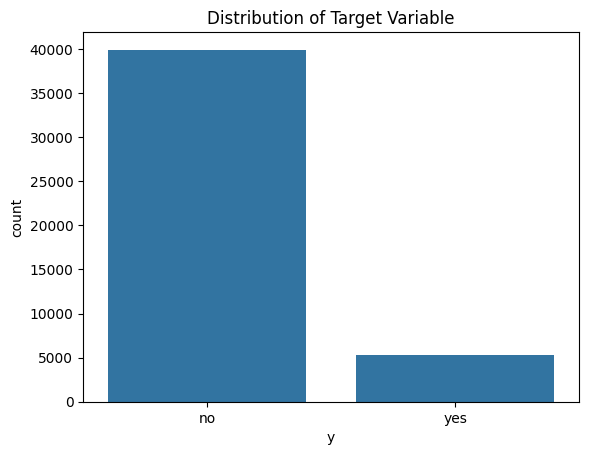

In [ ]:
#Inspecting the target variable (y)
print(data['y'].value_counts())
sns.countplot(data=data, x='y')
plt.title('Distribution of Target Variable')
plt.show()


Data Preprocessing

In [ ]:
# Encoding target: 'yes' to 1, 'no' to 0
# Converting the target variable (y) into binary values
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [ ]:
# Checking categorical and numerical features
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')


In [ ]:
# Encoding Categorical Features
# One-hot encode categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data.head())


        age   balance  day  duration  campaign     pdays  previous  y  \
0  1.606965  0.256419    5  0.011016 -0.569351 -0.411453  -0.25194  0   
1  0.288529 -0.437895    5 -0.416127 -0.569351 -0.411453  -0.25194  0   
2 -0.747384 -0.446762    5 -0.707361 -0.569351 -0.411453  -0.25194  0   
3  0.571051  0.047205    5 -0.645231 -0.569351 -0.411453  -0.25194  0   
4 -0.747384 -0.447091    5 -0.233620 -0.569351 -0.411453  -0.25194  0   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False              True  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0       True      False    

In [ ]:
# Splitting into features and target
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
# Feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Computing feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                Feature  Importance
3              duration    0.275178
1               balance    0.101952
0                   age    0.098269
2                   day    0.088008
40     poutcome_success    0.051555
5                 pdays    0.042201
4              campaign    0.040019
24          housing_yes    0.021943
6              previous    0.019108
27      contact_unknown    0.014394
34            month_mar    0.013104
20  education_secondary    0.013043
18      marital_married    0.011955
21   education_tertiary    0.011594
15       job_technician    0.011013
33            month_jun    0.010642
10       job_management    0.010607
37            month_oct    0.010486
35            month_may    0.010368
25             loan_yes    0.009973
19       marital_single    0.009808
28            month_aug    0.009661
32            month_jul    0.009328
7       job_blue-collar    0.009195
36            month_nov    0.008749
41     poutcome_unknown    0.008641
30            month_feb    0

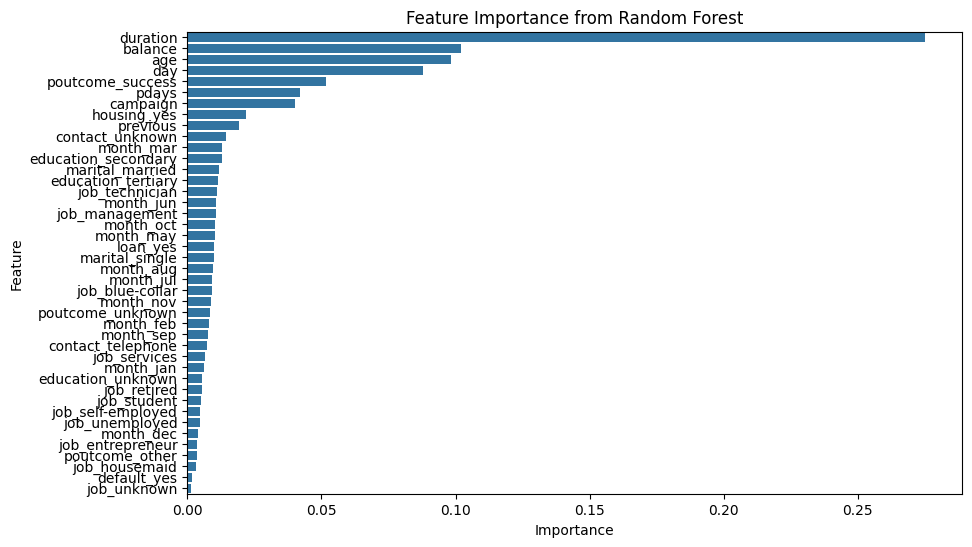

In [ ]:
# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
# Selecting important features based on mean importance
selector = SelectFromModel(rf, threshold='mean')
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='mean')

In [ ]:
# Transforming the dataset to keep only selected features
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'poutcome_success'],
      dtype='object')


In [ ]:
# Convert selected features back to a DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [ ]:
# Scaling numerical features for Neural Network
scaler = StandardScaler()
X_scaled = X_selected_df.copy()
numerical_cols = X_selected_df.select_dtypes(include=['int64', 'float64']).columns
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

In [ ]:
# Splitting data into train-test sets for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_selected_df, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Splitting data into train-test sets for Neural Network (scaled features)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Verifying shapes
print("Random Forest Dataset:")
print("Training set size (RF):", X_train_rf.shape, "Test set size (RF):", X_test_rf.shape)
print("Neural Network Dataset:")
print("Training set size (NN):", X_train_nn.shape, "Test set size (NN):", X_test_nn.shape)

Random Forest Dataset:
Training set size (RF): (36168, 7) Test set size (RF): (9043, 7)
Neural Network Dataset:
Training set size (NN): (36168, 7) Test set size (NN): (9043, 7)


In [ ]:
# Save the processed datasets for Random Forest and Neural Network
X_train_rf.to_csv('X_train_rf.csv', index=False)
X_test_rf.to_csv('X_test_rf.csv', index=False)
y_train_rf.to_csv('y_train_rf.csv', index=False)
y_test_rf.to_csv('y_test_rf.csv', index=False)

X_train_nn.to_csv('X_train_nn.csv', index=False)
X_test_nn.to_csv('X_test_nn.csv', index=False)
y_train_nn.to_csv('y_train_nn.csv', index=False)
y_test_nn.to_csv('y_test_nn.csv', index=False)

In [ ]:
# Downloading the datasets
from google.colab import files
files.download('X_train_rf.csv')
files.download('X_test_rf.csv')
files.download('y_train_rf.csv')
files.download('y_test_rf.csv')

files.download('X_train_nn.csv')
files.download('X_test_nn.csv')
files.download('y_train_nn.csv')
files.download('y_test_nn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # Import SMOTE for class imbalance handling

# Random Forest dataset
import pandas as pd
X_train_rf = pd.read_csv('X_train_rf.csv')
X_test_rf = pd.read_csv('X_test_rf.csv')
y_train_rf = pd.read_csv('y_train_rf.csv').squeeze()  # Convert to Series
y_test_rf = pd.read_csv('y_test_rf.csv').squeeze()    # Convert to Series

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_rf, y_train_rf = smote.fit_resample(X_train_rf, y_train_rf)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=200,        # Number of trees in the forest
    max_depth=15,            # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split
    min_samples_leaf=1,      # Minimum number of samples at a leaf node
    class_weight='balanced'  # Adjust class weights to handle imbalance
)

# Train the Random Forest model
rf_model.fit(X_train_rf, y_train_rf)
print("Random Forest model training complete.")

# Testing and evaluation
y_pred_rf = rf_model.predict(X_test_rf)
y_prob_rf = rf_model.predict_proba(X_test_rf)[:, 1]  # For ROC-AUC

# Evaluation metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test_rf, y_prob_rf))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Random Forest model training complete.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7985
           1       0.45      0.64      0.53      1058

    accuracy                           0.87      9043
   macro avg       0.70      0.77      0.73      9043
weighted avg       0.89      0.87      0.88      9043

Accuracy: 0.8678535884109255
ROC-AUC: 0.8761201591358088


Neaural Network

In [ ]:
# Import necessary libraries
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, accuracy_score

# Reload the preprocessed dataset
X_train_nn = pd.read_csv('X_train_selected.csv')
X_test_nn = pd.read_csv('X_test_selected.csv')
y_train_nn = pd.read_csv('y_train.csv').squeeze()
y_test_nn = pd.read_csv('y_test.csv').squeeze()

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_nn, y_train_nn = smote.fit_resample(X_train_nn, y_train_nn)

# Build the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_nn.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with validation
history = model.fit(X_train_nn, y_train_nn,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    # class_weight=class_weights,  # Uncomment if using class weights
                    verbose=1)

# Evaluate the model on test data
y_pred_nn = model.predict(X_test_nn).flatten()
y_pred_labels_nn = (y_pred_nn > 0.5).astype(int)

print("Classification Report (Neural Network):")
print(classification_report(y_test_nn, y_pred_labels_nn))
print("Accuracy (Neural Network):", accuracy_score(y_test_nn, y_pred_labels_nn))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7483 - loss: 0.6191 - val_accuracy: 0.6746 - val_loss: 0.6877
Epoch 2/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7976 - loss: 0.4817 - val_accuracy: 0.6895 - val_loss: 0.6466
Epoch 3/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7968 - loss: 0.4644 - val_accuracy: 0.7422 - val_loss: 0.5676
Epoch 4/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7967 - loss: 0.4522 - val_accuracy: 0.6745 - val_loss: 0.6283
Epoch 5/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8019 - loss: 0.4469 - val_accuracy: 0.7249 - val_loss: 0.5648
Epoch 6/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8010 - loss: 0.4469 - val_accuracy: 0.6978 - val_loss: 0.6076
Epoch 7/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8036 - loss: 0.4432 - val_accuracy: 0.7004 - val_loss: 0.5954
Epoch 8/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8009 - loss: 0.4451 -

Compare Model performance

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
      Metric  Random Forest  Neural Network
0   Accuracy       0.867854        0.843083
1  Precision       0.453934        0.411733
2     Recall       0.637996        0.701192
3   F1-Score       0.530452        0.518820
4    ROC-AUC       0.876120        0.874530


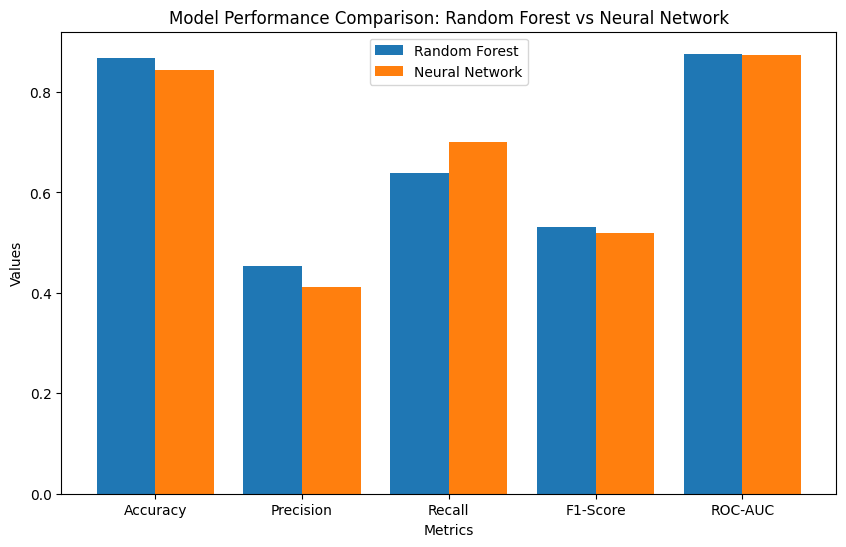

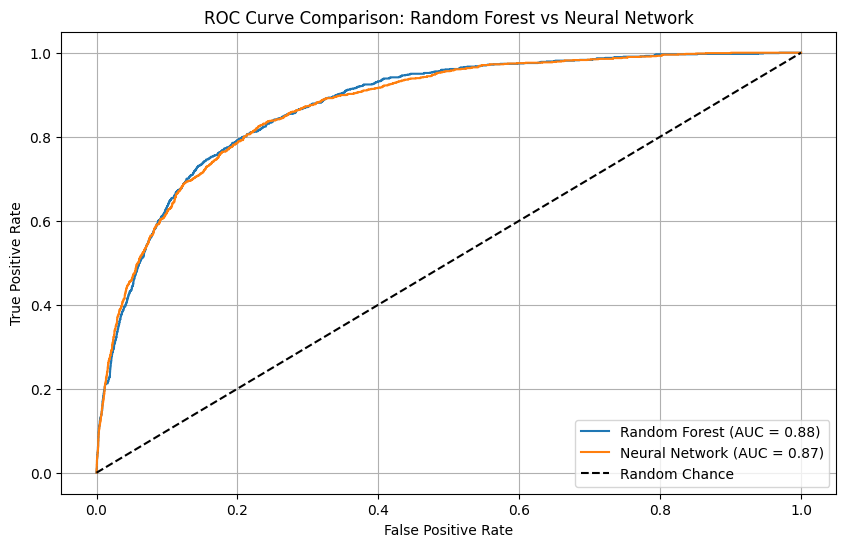

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import pandas as pd

# Assuming the Random Forest and Neural Network models are already trained, and predictions are made

# Random Forest predictions
y_pred_rf = rf_model.predict(X_test_rf)
y_prob_rf = rf_model.predict_proba(X_test_rf)[:, 1]  # For ROC-AUC

# Neural Network predictions
y_pred_nn = model.predict(X_test_nn).flatten()  # Probabilities
y_pred_labels_nn = (y_pred_nn > 0.5).astype(int)  # Convert to binary labels (0 or 1)

# Collect evaluation metrics for Random Forest
rf_report = classification_report(y_test_rf, y_pred_rf, output_dict=True)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test_rf, y_prob_rf)

# Collect evaluation metrics for Neural Network
nn_report = classification_report(y_test_nn, y_pred_labels_nn, output_dict=True)
nn_accuracy = accuracy_score(y_test_nn, y_pred_labels_nn)
nn_roc_auc = roc_auc_score(y_test_nn, y_pred_nn)

# Create a DataFrame for comparison
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Random Forest': [
        rf_accuracy,
        rf_report['1']['precision'],
        rf_report['1']['recall'],
        rf_report['1']['f1-score'],
        rf_roc_auc
    ],
    'Neural Network': [
        nn_accuracy,
        nn_report['1']['precision'],
        nn_report['1']['recall'],
        nn_report['1']['f1-score'],
        nn_roc_auc
    ]
}

comparison_df = pd.DataFrame(metrics)

# Print the table for model comparison
print(comparison_df)

# Bar Plot for Metrics Comparison
plt.figure(figsize=(10, 6))
x = range(len(metrics['Metric']))
plt.bar(x, comparison_df['Random Forest'], width=0.4, label='Random Forest', align='center')
plt.bar([p + 0.4 for p in x], comparison_df['Neural Network'], width=0.4, label='Neural Network', align='center')
plt.xticks([p + 0.2 for p in x], metrics['Metric'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Comparison: Random Forest vs Neural Network')
plt.legend()
plt.show()

# ROC Curve for Both Models
rf_fpr, rf_tpr, _ = roc_curve(y_test_rf, y_prob_rf)
nn_fpr, nn_tpr, _ = roc_curve(y_test_nn, y_pred_nn)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = {:.2f})'.format(nn_roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Random Forest vs Neural Network')
plt.legend()
plt.grid()
plt.show()

